# Guía 1

In [84]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [85]:
data = pd.read_csv("2023-03-08 Precios Casas RM.csv")
data

,Price_CLP,Price_UF,Price_USD,Comuna,Ubicacion,Dorms,Baths,Built Area,Total Area,Parking,id,Realtor
0,409285000,11500,509695,QuintaNormal,Hoevel4548y4558,7,4.0,384.0,732.0,3.0,11700213,NaN
1,105000000,2950,130760,PedroAguirreCerda,Rucalhue,2,1.0,112.0,145.0,1.0,10894299,Legales y Propiedades SpA
2,128124000,3600,159557,EstaciónCentral,AvenidaLasParcelas,3,1.0,59.0,243.0,2.0,10257635,Propiedadesrs
3,75000000,2107,93400,Colina,PasajeGonzaloRojas,3,1.0,103.0,73.0,1.0,9232092,Patricio Gajardo propiedades
4,53000000,1489,66002,Colina,HernánDíazArrieta2820,2,1.0,57.0,67.0,1.0,7085397,Patricio Gajardo propiedades
...,...,...,...,...,...,...,...,...,...,...,...,...
7774,2491300000,70000,3102491,LasCondes,CalleSanJosédeLaSierra,5,5.0,600.0,1800.0,5.0,4708915,Propiedades Viña Limitada ®
7775,242012000,6800,301385,Peñalolén,PasajeMarNegro,4,2.0,124.0,200.0,1.0,6641660,NaN
7776,3736950000,105000,4653736,LasCondes,CaminoLasFlores/CaminoPiedraRoja,5,7.0,460.0,4925.0,8.0,6032811,Tsi Property
7777,569440000,16000,709141,LaPintana,LosCipreses/LosDuraznos,4,2.0,311.0,2011.0,1.0,5314376,Tsi Property


# Exploratory Data Analysis (EDA)

In [86]:
data.columns

Index(['Price_CLP', 'Price_UF', 'Price_USD', 'Comuna', 'Ubicacion', 'Dorms',
       'Baths', 'Built Area', 'Total Area', 'Parking', 'id', 'Realtor'],
      dtype='object')

In [87]:
#y = data["Price_UF"] # Asignar y como el precio en UF
#data = data.drop(columns=["Price_UF"]) # Eliminar ese precio de data

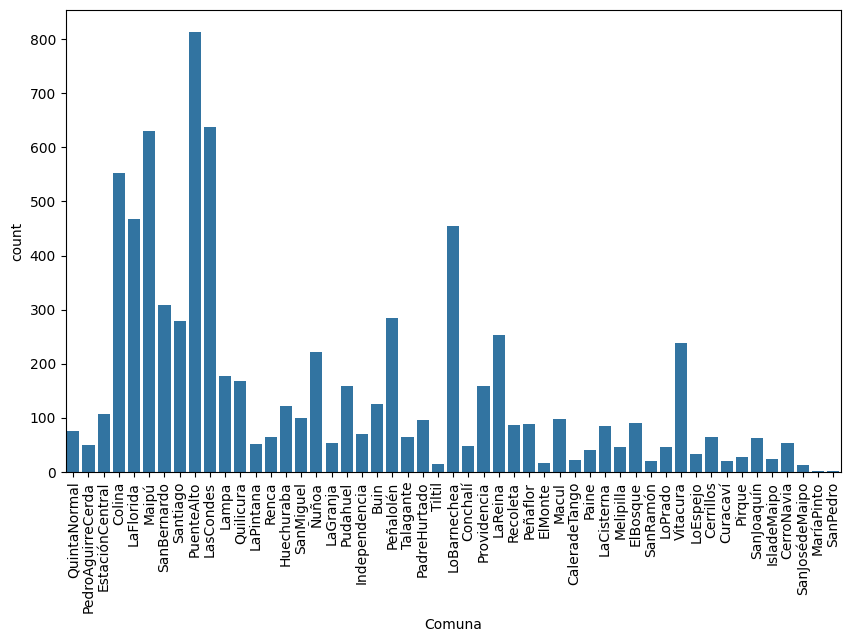

In [88]:
#Plot comunas
plt.figure(figsize=(10,6))
sns.countplot(data, x = "Comuna")
plt.xticks(rotation=90)
plt.show()

In [89]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7779 entries, 0 to 7778
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Price_CLP   7779 non-null   int64  
 1   Price_UF    7779 non-null   int64  
 2   Price_USD   7779 non-null   int64  
 3   Comuna      7779 non-null   object 
 4   Ubicacion   7779 non-null   object 
 5   Dorms       7779 non-null   int64  
 6   Baths       7714 non-null   float64
 7   Built Area  7533 non-null   float64
 8   Total Area  7571 non-null   float64
 9   Parking     5489 non-null   float64
 10  id          7779 non-null   int64  
 11  Realtor     7184 non-null   object 
dtypes: float64(4), int64(5), object(3)
memory usage: 729.4+ KB


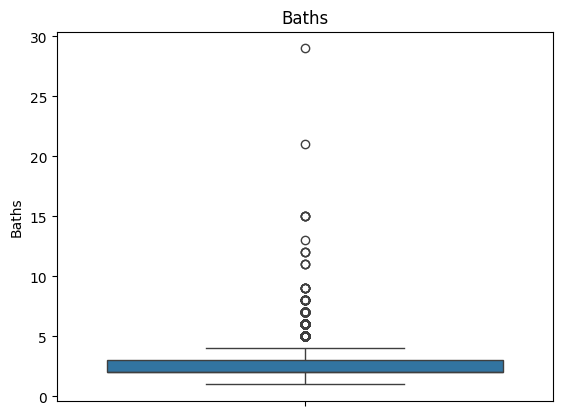

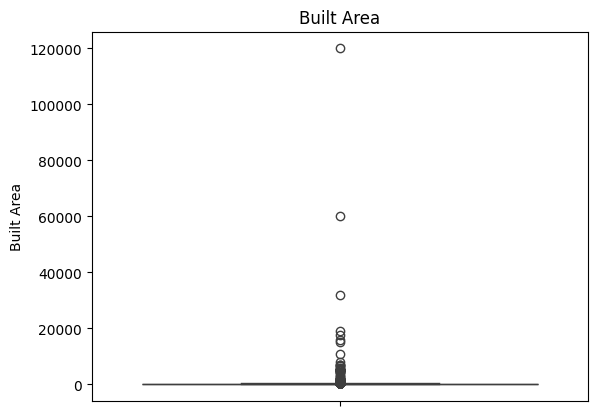

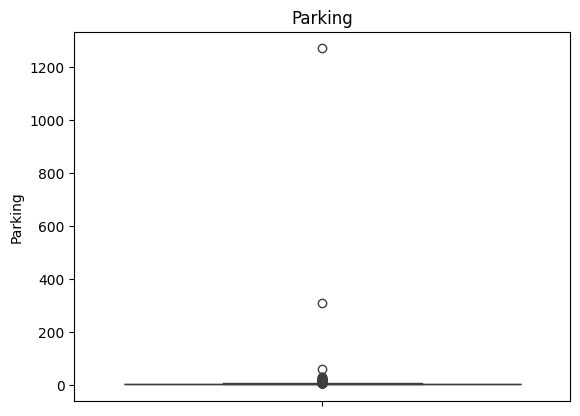

In [90]:
def make_boxplot(data,column): #Funcion paraa plotear un boxplot de una columna
    sns.boxplot(data, y= column) #Boxplot
    plt.title(column) #Setea el titulo
    plt.show()
make_boxplot(data, "Baths")
make_boxplot(data, "Built Area")
make_boxplot(data, "Parking")


In [91]:
data.describe()

,Price_CLP,Price_UF,Price_USD,Dorms,Baths,Built Area,Total Area,Parking,id
count,7.779000e+03,7779.000000,7.779000e+03,7779.000000,7714.000000,7533.000000,7571.000000,5489.000000,7.779000e+03
mean,3.642481e+08,10234.571153,4.536091e+05,3.994087,2.653746,229.923669,807.919826,2.980506,9.910828e+06
std,3.868810e+08,10870.491584,4.817945e+05,1.622821,1.465103,1676.898812,9050.893115,17.749384,2.046317e+06
min,2.085000e+03,0.000000,3.000000e+00,1.000000,1.000000,1.000000,1.000000,1.000000,1.213620e+06
25%,1.200000e+08,3372.000000,1.494400e+05,3.000000,2.000000,85.000000,129.500000,1.000000,8.563078e+06
50%,2.050000e+08,5760.000000,2.552930e+05,4.000000,2.000000,128.000000,210.000000,2.000000,1.054807e+07
75%,4.911420e+08,13800.000000,6.116340e+05,5.000000,3.000000,200.000000,443.000000,3.000000,1.152463e+07
max,5.516450e+09,155000.000000,6.869801e+06,27.000000,29.000000,120000.000000,678000.000000,1269.000000,1.234149e+07


In [92]:
#Filter data
def iqr(data, column): #Inter quantile range
    q3 = data[column].quantile(0.75) #3er cuartil
    q1 = data[column].quantile(0.25) #1er cuartil
    superior_limit = q3 + 1.5*(q3 - q1)
    inferior_limit = q1 - 1.5*(q3 - q1)
    return data[(data[column] < superior_limit) & (data[column] > inferior_limit)] #Select data


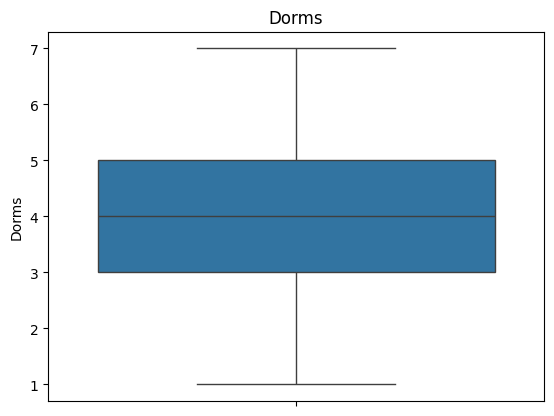

In [93]:
data = iqr(data, "Dorms")
make_boxplot(data, "Dorms")

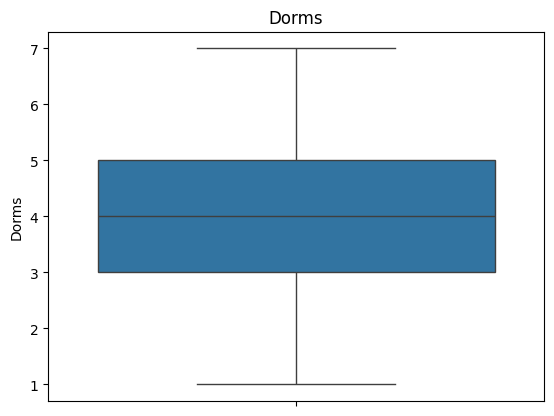

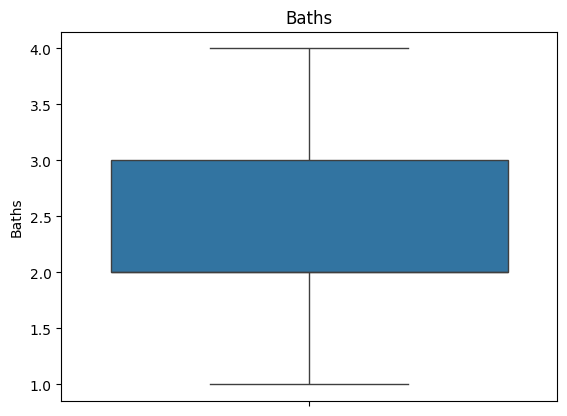

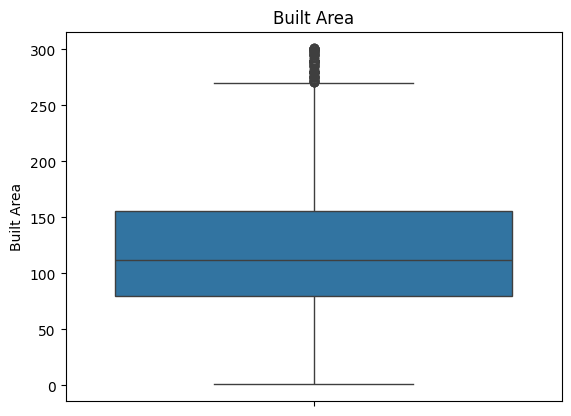

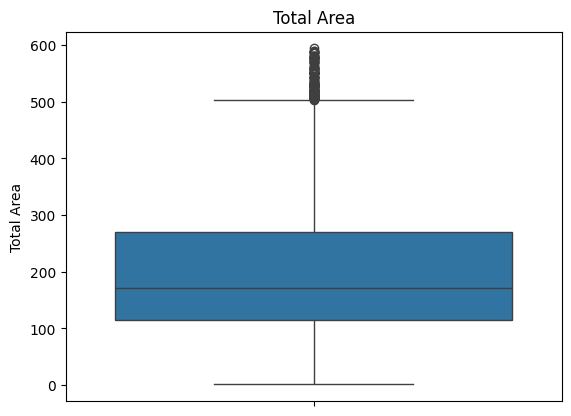

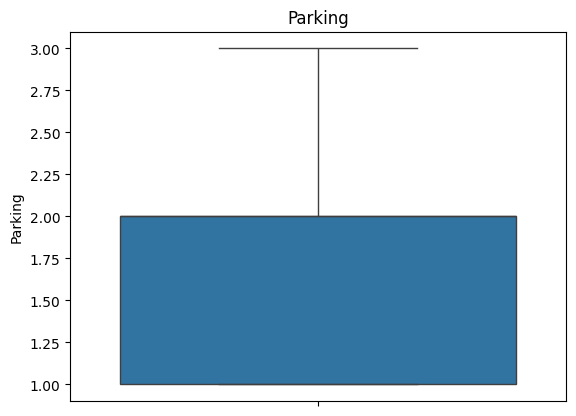

In [94]:
for col in ['Dorms', 'Baths', 'Built Area', 'Total Area', 'Parking']:
    data = iqr(data, col) #Uses iqr
    make_boxplot(data, col) #Plot distr
    #Isolation forest -> sklearn

In [95]:
for column in data.columns: #Iterar las columnas
    data = data[data[column].notna()] #Borrar nulos
    print(column, len(data[data[column].isna()])) #Ver la cantidada de nulos
    

Price_CLP 0
Price_UF 0
Price_USD 0
Comuna 0
Ubicacion 0
Dorms 0
Baths 0
Built Area 0
Total Area 0
Parking 0
id 0
Realtor 0


In [96]:
data

,Price_CLP,Price_UF,Price_USD,Comuna,Ubicacion,Dorms,Baths,Built Area,Total Area,Parking,id,Realtor
1,105000000,2950,130760,PedroAguirreCerda,Rucalhue,2,1.0,112.0,145.0,1.0,10894299,Legales y Propiedades SpA
2,128124000,3600,159557,EstaciónCentral,AvenidaLasParcelas,3,1.0,59.0,243.0,2.0,10257635,Propiedadesrs
3,75000000,2107,93400,Colina,PasajeGonzaloRojas,3,1.0,103.0,73.0,1.0,9232092,Patricio Gajardo propiedades
4,53000000,1489,66002,Colina,HernánDíazArrieta2820,2,1.0,57.0,67.0,1.0,7085397,Patricio Gajardo propiedades
6,75000000,2107,93400,Colina,GabrielaMistral/PabloNeruda,3,1.0,70.0,80.0,2.0,11688480,Patricio Gajardo propiedades
...,...,...,...,...,...,...,...,...,...,...,...,...
7765,176134910,4949,219346,Maipú,Loprado,6,2.0,181.0,170.0,2.0,6888423,Propiedades Viña Limitada ®
7766,9500,0,12,Pudahuel,DelCrepúsculo1417,4,3.0,235.0,365.0,2.0,7179970,Promoción Inmobiliaria
7767,6800,0,8,Pudahuel,Av.losMolinos1832,3,3.0,100.0,199.0,2.0,7168071,Promoción Inmobiliaria
7768,188627000,5300,234903,EstaciónCentral,LaCoruña5044,4,2.0,114.0,220.0,3.0,4822161,Promoción Inmobiliaria


In [97]:
X = data[['Dorms', 'Baths', 'Built Area', 'Total Area']]
y = data['Price_UF']

## Model Training

In [98]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso 
#Ridge -> Penalty L2
#Lasso -> Penalty L1
from sklearn.model_selection import train_test_split, cross_validate
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import Pipeline

In [99]:
X_train, X_test, y_train, y_test = train_test_split(X,y, random_state=42) #Dividir en entrenamiento y testing
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((2472, 4), (824, 4), (2472,), (824,))

In [100]:
lr = LinearRegression()
lr.fit(X_train, y_train) #Training

LinearRegression()

In [101]:
lr.score(X_train, y_train) #R2 -> Varianza explicada

0.633788038256862

In [102]:
rid = Ridge(alpha=0.2) #L2 norm
rid.fit(X_train, y_train)
rid.score(X_train, y_train)

0.6337880373159769

In [103]:
las = Lasso(alpha=0.2) #L1 norm
las.fit(X_train, y_train)
las.score(X_train, y_train)

0.633788031845735

In [ ]:
pf = PolynomialFeatures(degree = 2) # Transorma la matriz agregando terminos polinomiales
lr = LinearRegression()
pipe = Pipeline( # Concatenar procesos
    [
        ('polynomiaf', pf),
        ('linear regression', lr)

    ]

) 
pipe
pipe.fit(X_train, y_train)
pipe.score(X_train, y_train) #Only training now

0.6681785002399963

In [116]:
cv_score = cross_validate(pipe, X_train, y_train, cv=10)['test_score'] ##Cross validation with k=10
'Mean:', cv_score.mean(), 'STD:', cv_score.std()

('Mean:',
 np.float64(0.6595045548783087),
 'STD:',
 np.float64(0.04032867572101614))

In [117]:
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

In [119]:
pipe.fit(X_train, y_train)
y_pred = pipe.predict(X_test)
print('MSE', mean_squared_error(y_test, y_pred))
print('MAE', mean_absolute_error(y_test, y_pred))
print('R2', r2_score(y_test, y_pred))

MSE 8649215.543705272
MAE 1937.1174379237743
R2 0.6570178306184355


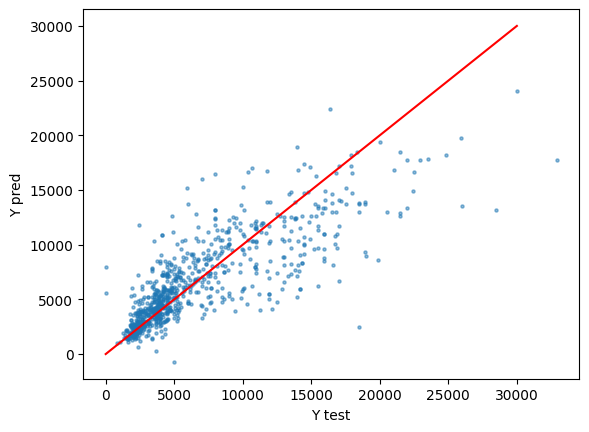

In [122]:
plt.scatter(y_test, y_pred, alpha=0.5, s=5)
plt.xlabel('Y test')
plt.ylabel('Y pred')
plt.plot([0,30000], [0,30000], color='red')
plt.show()

<Axes: ylabel='Price_CLP'>

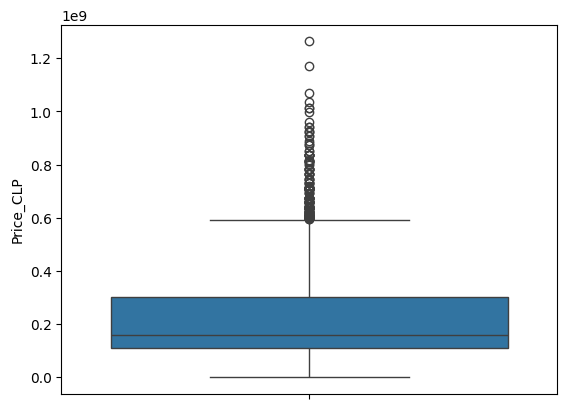

In [104]:
sns.boxplot(data, y="Price_CLP")

<Axes: xlabel='Price_CLP', ylabel='Count'>

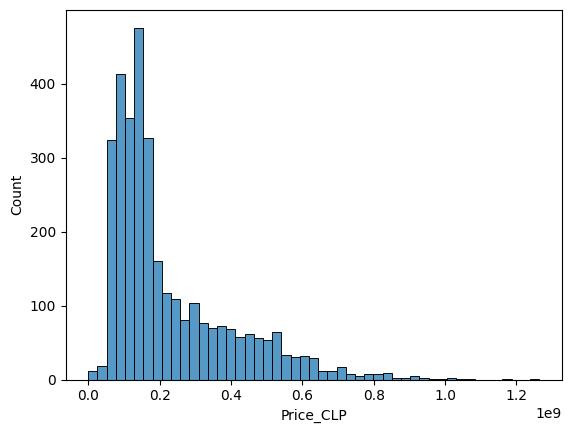

In [105]:
sns.histplot(data, x="Price_CLP")

<Axes: ylabel='Dorms'>

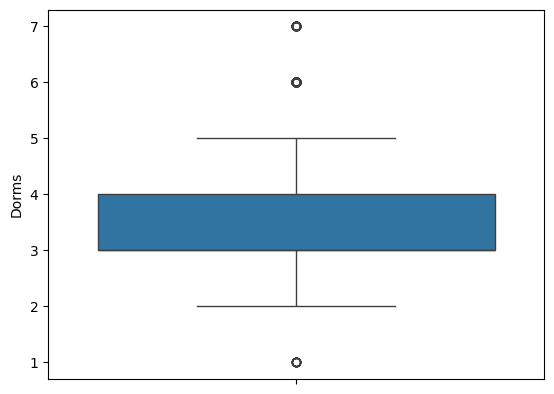

In [106]:
sns.boxplot(data, y="Dorms")

<Axes: ylabel='Total Area'>

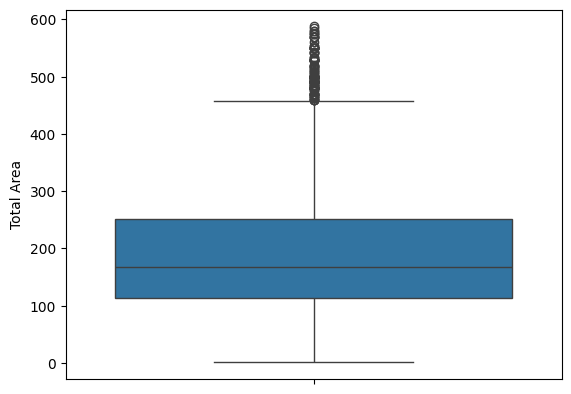

In [107]:
sns.boxplot(data, y="Total Area")

<Axes: xlabel='Dorms', ylabel='Count'>

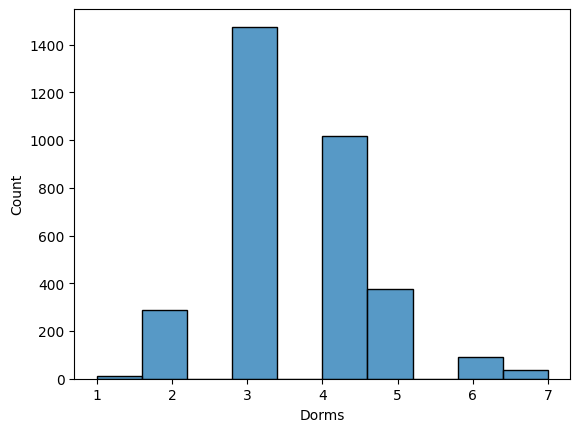

In [108]:
sns.histplot(data, x="Dorms", bins= 10)

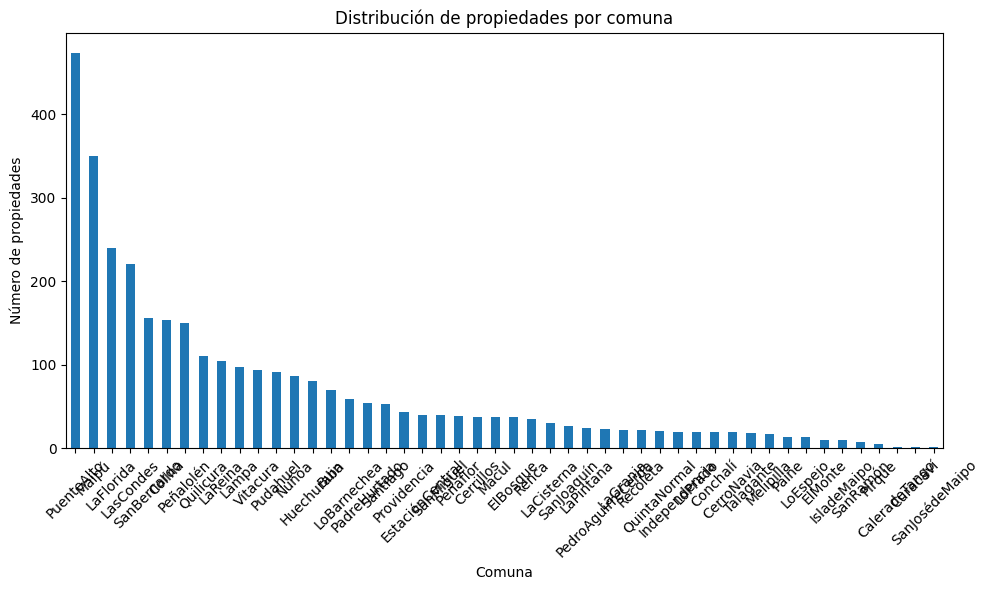

In [109]:
counts = data["Comuna"].value_counts()    # cuenta frecuencia de cada categoría
counts.plot.bar(figsize=(10,6))
plt.xticks(rotation=45)
plt.xlabel("Comuna")
plt.ylabel("Número de propiedades")
plt.title("Distribución de propiedades por comuna")
plt.tight_layout()
plt.show()
